In [1]:
# # Usado para renderizar graficos de mermaid en jupyter notebook
# import base64
# import io, requests
# from IPython.display import Image, display
# from PIL import Image as im
# import matplotlib.pyplot as plt

# def mm(graph):
#     graphbytes = graph.encode("utf8")
#     base64_bytes = base64.urlsafe_b64encode(graphbytes)
#     base64_string = base64_bytes.decode("ascii")
#     img = im.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
#     plt.imshow(img)
#     plt.axis('off') # allow to hide axis
#     plt.savefig('image.png', dpi=12000)

In [2]:
# Usado para renderizar graficos de mermaid en jupyter notebook
# Ajuste da função mm() para gerar imagens em tamanho A4
import base64
import io, requests
from IPython.display import Image, display
from PIL import Image as im
import matplotlib.pyplot as plt

# Ajuste da função mm() para gerar imagens em tamanho A4
def mm(graph):
    """
    Renderiza um gráfico Mermaid em formato A4.
    """
    # Converte o texto do gráfico para base64
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    
    # Obtém a imagem do serviço Mermaid
    img = im.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
    
    # Configuração para tamanho A4 (largura ~210mm, altura ~297mm)
    # Convertendo para polegadas (1mm = 0.0393701 polegadas)
    a4_width_inches = 8.27
    a4_height_inches = 11.69
    
    plt.figure(figsize=(a4_width_inches, a4_height_inches))
    
    # Renderiza a imagem
    plt.imshow(img)
    plt.axis('off')  # oculta os eixos
    
    # Adiciona um título
    plt.title('Fluxograma do Algoritmo Híbrido PSO-GA', fontsize=16, pad=20)
    
    # Adiciona uma legenda explicativa
    legend_text = (
        "GA: Algoritmo Genético\n"
        "PSO: Otimização por Enxame de Partículas\n"
        "Híbrido: Combinação de GA e PSO"
    )
    plt.figtext(0.5, 0.02, legend_text, ha='center', fontsize=10, 
                bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
    
    # Ajusta o layout para melhor aproveitamento do espaço
    plt.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.97])
    
    # Salva com alta resolução
    plt.savefig('flowchart_hybrid_pso_ga.pdf', format='pdf', dpi=300)
    plt.savefig('flowchart_hybrid_pso_ga.png', format='png', dpi=300)
    
    # Mostra na tela
    plt.show()

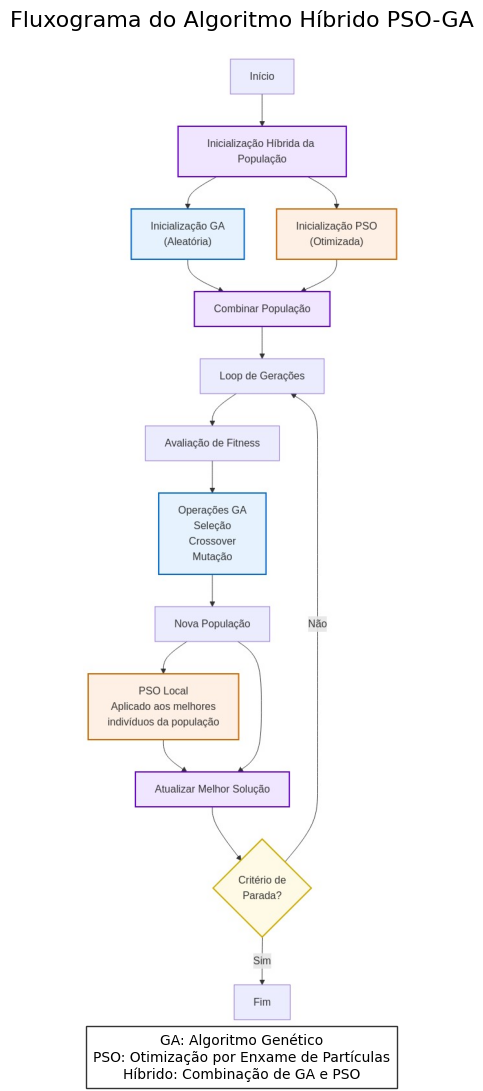

In [3]:
mm("""
flowchart TD
    classDef gaClass fill:#E6F3FF,stroke:#0066CC,stroke-width:2px
    classDef psoClass fill:#FFF0E6,stroke:#CC6600,stroke-width:2px
    classDef hybridClass fill:#F0E6FF,stroke:#6600CC,stroke-width:2px
    classDef decisionClass fill:#FFFAE6,stroke:#CCAA00,stroke-width:2px
    
    start["Início"] --> init["Inicialização Híbrida da População"]
    class init hybridClass
    
    init --> gaInit["Inicialização GA\n(Aleatória)"]
    init --> psoInit["Inicialização PSO\n(Otimizada)"]
    class gaInit gaClass
    class psoInit psoClass
    
    gaInit --> combine["Combinar População"]
    psoInit --> combine
    class combine hybridClass
    
    combine --> genLoop["Loop de Gerações"]
    
    genLoop --> fitness["Avaliação de Fitness"]
    
    fitness --> gaOps["Operações GA\nSeleção\nCrossover\nMutação"]
    class gaOps gaClass
    
    gaOps --> newPop["Nova População"]
    
    newPop --> psoLocal["PSO Local\nAplicado aos melhores\nindivíduos da população"]
    class psoLocal psoClass
    
    psoLocal --> update["Atualizar Melhor Solução"]
    newPop --> update
    class update hybridClass
    
    update --> decision{"Critério de\nParada?"}
    class decision decisionClass
    
    decision -->|"Sim"| finish["Fim"]
    decision -->|"Não"| genLoop
""")

Conjunto de dados: 569 amostras, 30 características

População GA inicializada com 24 indivíduos.
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0]
 [1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0]
 [1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1]
 [0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 1 1 0 0 0 0 1 1 

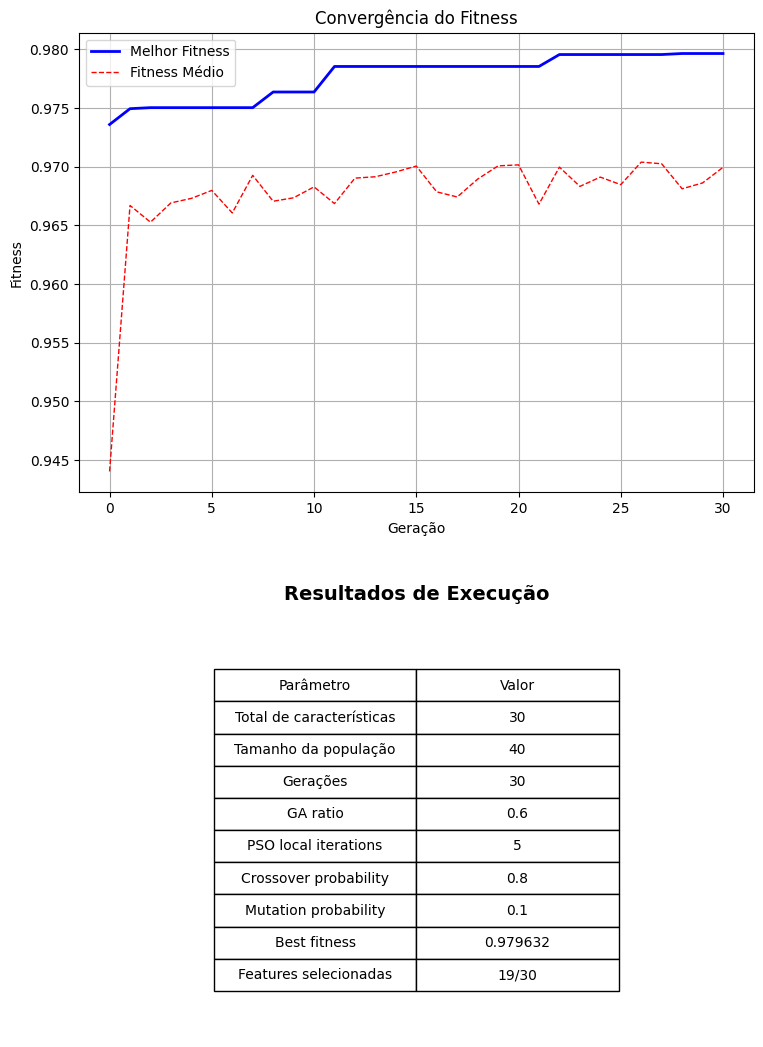

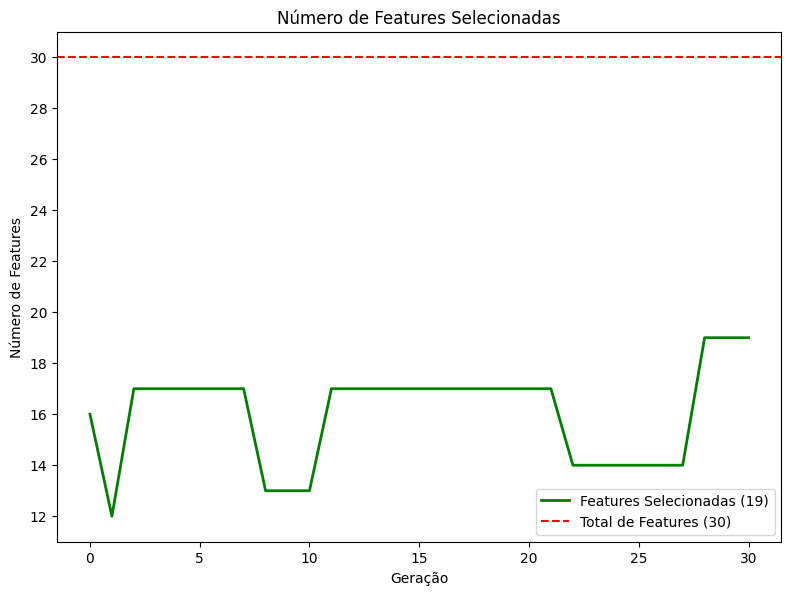

In [4]:
from hybrid_pso_ga import Hybrid_PSO_GA
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC


# Carregar dados
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

print(f"Conjunto de dados: {X.shape[0]} amostras, {X.shape[1]} características")

# Criar e executar o algoritmo híbrido
hybrid = Hybrid_PSO_GA(
    X=X, 
    y=y, 
    n_individuals=40,
    ga_ratio=0.6,  # 60% GA, 40% PSO na inicialização
    pso_local_iterations=5,
    max_generations=30,
    crossover_prob=0.8,
    mutation_prob=0.1,
    w=0.7,
    c1=1.5,
    c2=1.5,
    classifier=SVC(gamma='auto'),
    cv=5,
    alpha=0.01,
    min_features=2,
    feature_names=dataset.feature_names if hasattr(dataset, 'feature_names') else None,
)

# Executar o algoritmo
selected_features, best_fitness, best_solution = hybrid.run()

hybrid.plot_convergence()
# Plotar resultados
hybrid.plot_results()